In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import sklearn

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape,y_train.shape,"***********",x_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***********', (10000, 28, 28), (10000,))

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
y_train[0]

9

In [6]:
class_labels=[ "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

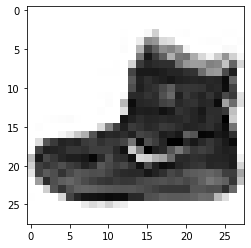

In [8]:
plt.imshow(x_train[0],cmap="Greys")

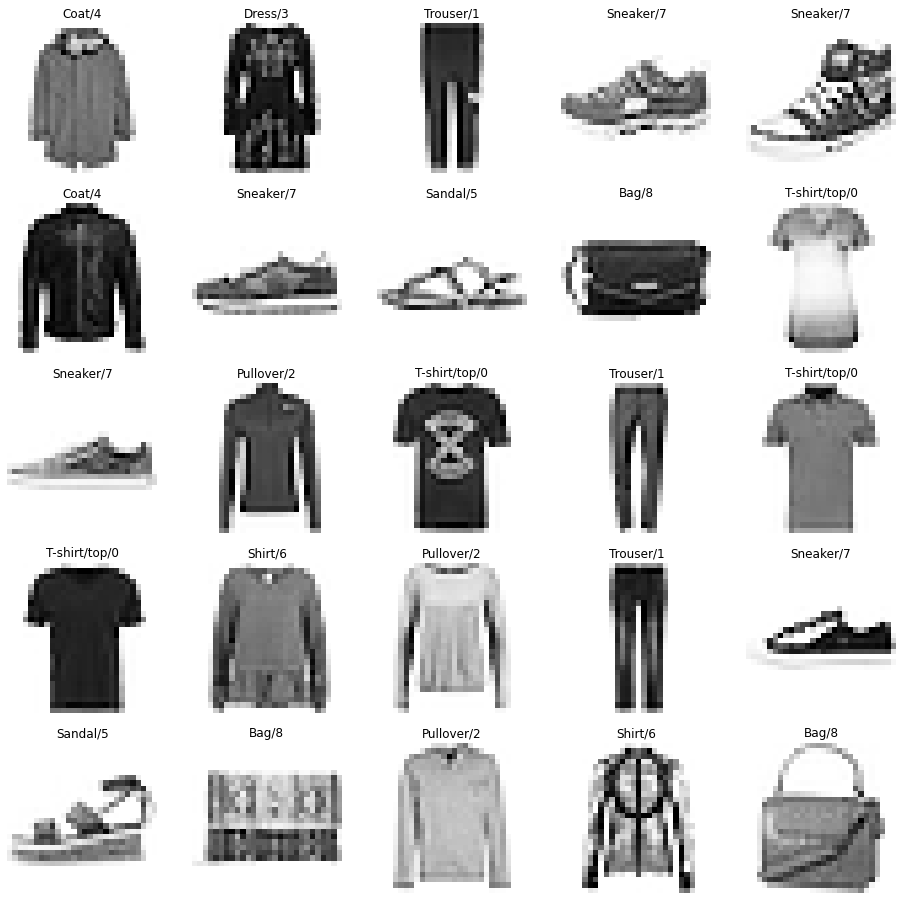

In [9]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(x_train[i],cmap="Greys")
  plt.axis('off')
  plt.title('{}/{}'.format(class_labels[y_train[i]],y_train[i]))


In [10]:
x_train.ndim

3

In [11]:
x_train=np.expand_dims(x_train,-1)

In [12]:
x_train.ndim

4

In [13]:
x_test=np.expand_dims(x_test,-1)

In [14]:
x_train=x_train/255
x_test=x_test/255

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_validation,y_train,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=2020)

In [16]:
x_train.shape,x_validation.shape,y_train.shape,y_validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [17]:
model=keras.models.Sequential([keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
keras.layers.MaxPooling2D(pool_size=(2,2)),
keras.layers.Flatten(),keras.layers.Dense(units=128,activation='relu'),
keras.layers.Dense(units=10,activation='softmax')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(x_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(x_validation,y_validation))

Epoch 1/10
94/94 [==============================] - 23s 237ms/step - loss: 0.6127 - accuracy: 0.7951 - val_loss: 0.4145 - val_accuracy: 0.8602
Epoch 2/10
94/94 [==============================] - 21s 224ms/step - loss: 0.3770 - accuracy: 0.8689 - val_loss: 0.3680 - val_accuracy: 0.8734
Epoch 3/10
94/94 [==============================] - 25s 270ms/step - loss: 0.3337 - accuracy: 0.8833 - val_loss: 0.3509 - val_accuracy: 0.8812
Epoch 4/10
94/94 [==============================] - 22s 231ms/step - loss: 0.3047 - accuracy: 0.8925 - val_loss: 0.3329 - val_accuracy: 0.8829
Epoch 5/10
94/94 [==============================] - 21s 224ms/step - loss: 0.2845 - accuracy: 0.8985 - val_loss: 0.3032 - val_accuracy: 0.8952
Epoch 6/10
94/94 [==============================] - 20s 216ms/step - loss: 0.2633 - accuracy: 0.9059 - val_loss: 0.3096 - val_accuracy: 0.8916
Epoch 7/10
94/94 [==============================] - 21s 222ms/step - loss: 0.2525 - accuracy: 0.9103 - val_loss: 0.2995 - val_accuracy: 0.8944

In [21]:
y_pred=model.predict(x_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.06, 0.02, 0.01]], dtype=float32)

In [22]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [23]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2844 - accuracy: 0.8976


[0.28436487913131714, 0.897599995136261]

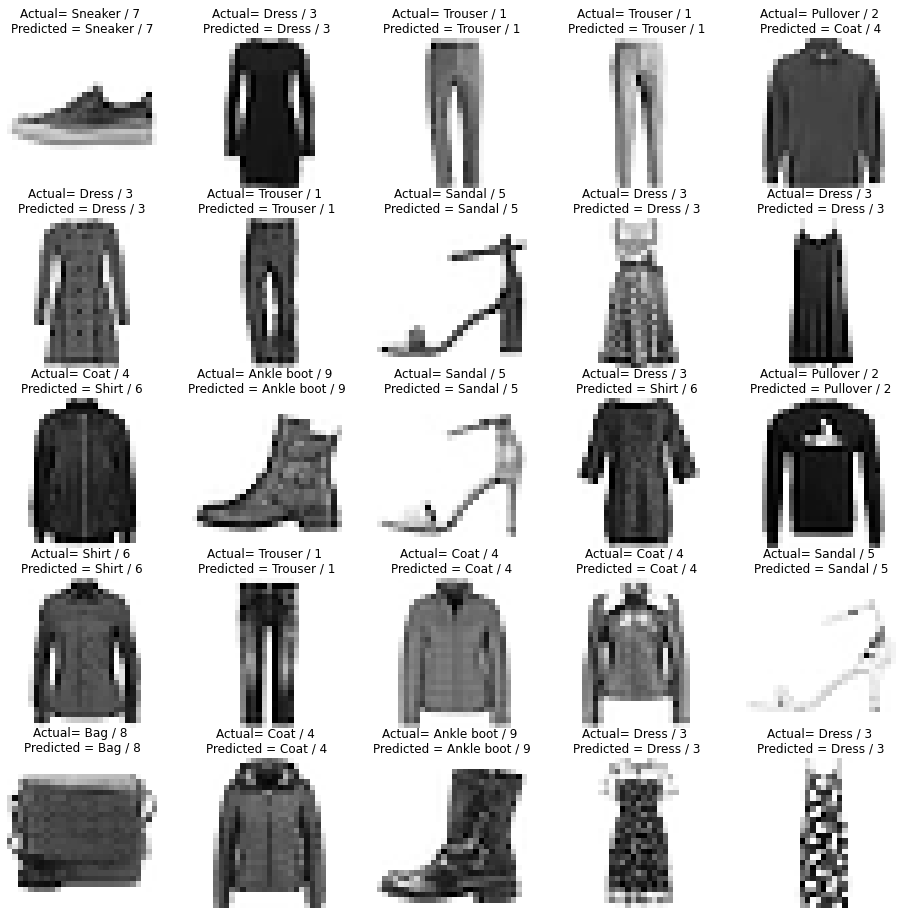

In [24]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(x_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual= {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

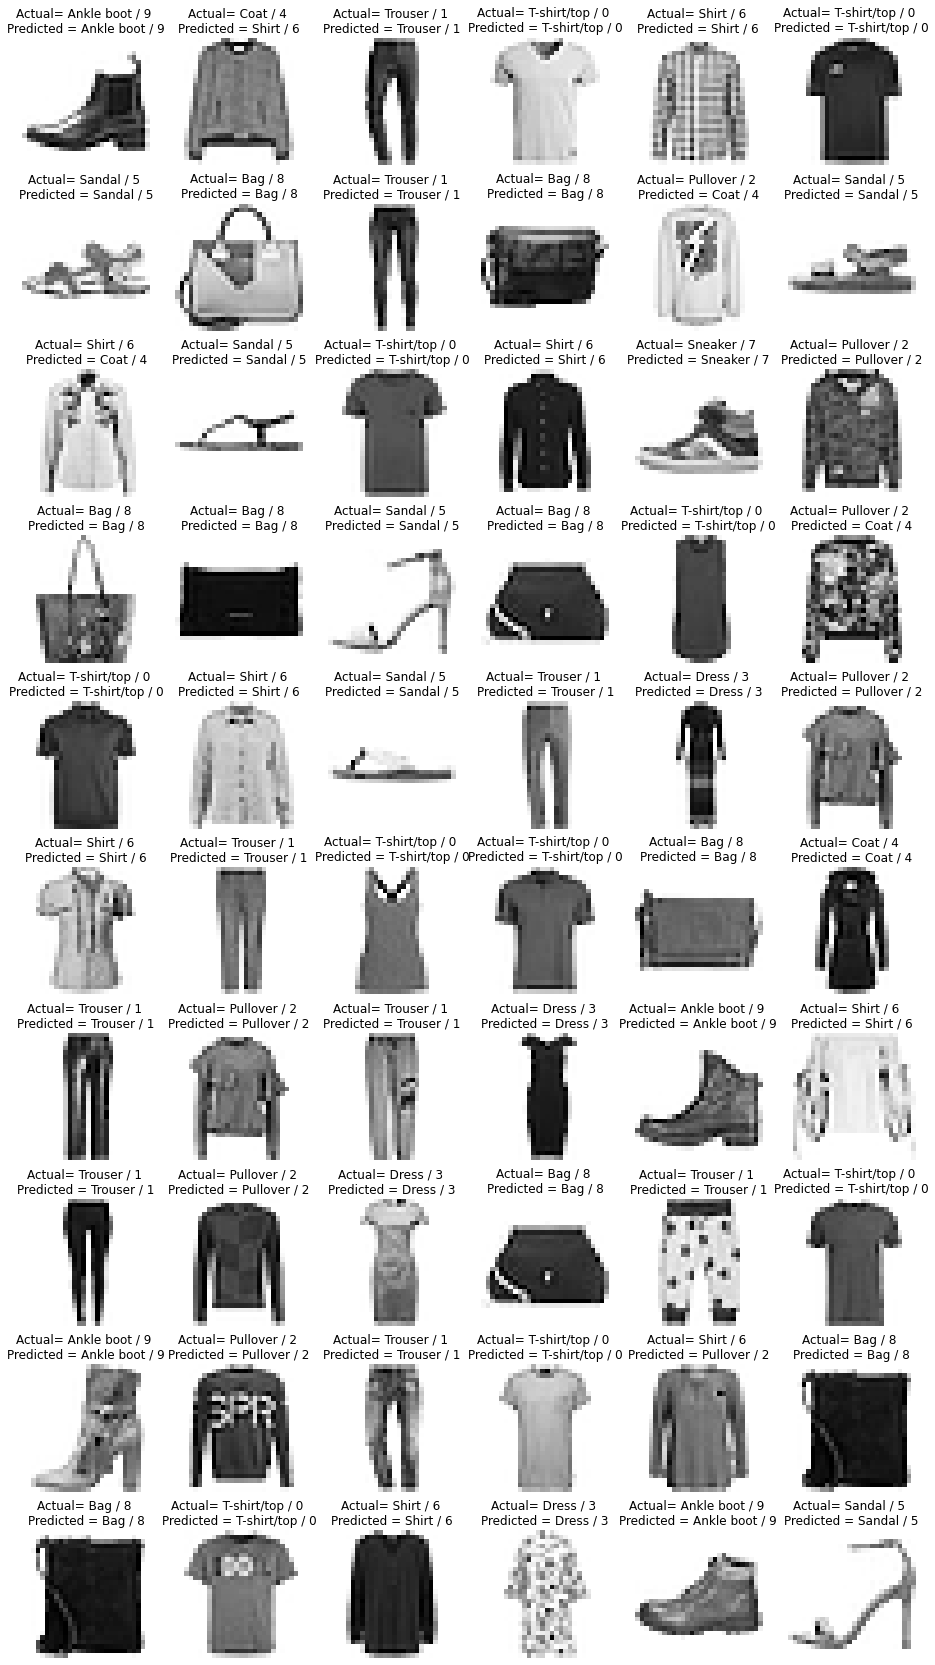

In [25]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j);j+=1
  plt.imshow(x_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual= {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [26]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels=[np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.90      0.78      0.84      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.87      0.81      0.84      1000
       Dress       0.87      0.93      0.90      1000
        Coat       0.87      0.82      0.84      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.67      0.80      0.73      1000
     Sneaker       0.95      0.96      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



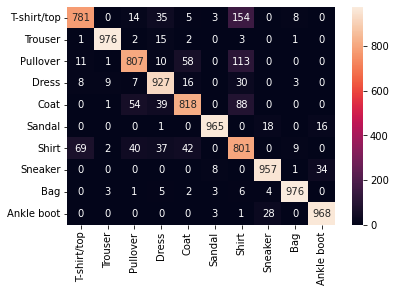

In [27]:
sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_labels,yticklabels=class_labels)
from sklearn.metrics import classification_report
cr= classification_report(y_test,y_pred_labels,target_names=class_labels)
print(cr)

In [28]:
model.save('fashion_mnist_cnn_model.h5')

In [29]:
cnn_model2=keras.models.Sequential([
                                   keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                                   keras.layers.MaxPooling2D(pool_size=(2,2)),
                                   
                                   keras.layers.Conv2D(filters=64,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
                                   keras.layers.MaxPooling2D(pool_size=(2,2)),
                                   keras.layers.Flatten(),
                                   keras.layers.Dense(units=128,activation='relu'),
                                   keras.layers.Dropout(0.25),
                                   
                                   keras.layers.Dense(units=256,activation='relu'),
                                   keras.layers.Dropout(0.25),
                                   keras.layers.Dense(units=128,activation='relu'),
                                   
                                   keras.layers.Dense(units=10,activation='softmax')
])

cnn_model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn_model2.fit(x_train,y_train,epochs=20,batch_size=512,verbose=1,validation_data=(x_validation,y_validation))
cnn_model2.save('fashion_mnist_model2.h5')

Epoch 1/20
94/94 [==============================] - 26s 271ms/step - loss: 1.0188 - accuracy: 0.6164 - val_loss: 0.5848 - val_accuracy: 0.7734
Epoch 2/20
94/94 [==============================] - 25s 269ms/step - loss: 0.5565 - accuracy: 0.7920 - val_loss: 0.4610 - val_accuracy: 0.8322
Epoch 3/20
94/94 [==============================] - 25s 267ms/step - loss: 0.4662 - accuracy: 0.8270 - val_loss: 0.4125 - val_accuracy: 0.8501
Epoch 4/20
94/94 [==============================] - 25s 271ms/step - loss: 0.4048 - accuracy: 0.8544 - val_loss: 0.3707 - val_accuracy: 0.8626
Epoch 5/20
94/94 [==============================] - 25s 268ms/step - loss: 0.3688 - accuracy: 0.8671 - val_loss: 0.3400 - val_accuracy: 0.8763
Epoch 6/20
94/94 [==============================] - 26s 272ms/step - loss: 0.3460 - accuracy: 0.8732 - val_loss: 0.3402 - val_accuracy: 0.8747
Epoch 7/20
94/94 [==============================] - 26s 272ms/step - loss: 0.3281 - accuracy: 0.8801 - val_loss: 0.3203 - val_accuracy: 0.8828

In [30]:
cnn_model3=keras.models.Sequential([
                                   keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                                   keras.layers.MaxPooling2D(pool_size=(2,2)),
                                   keras.layers.Conv2D(filters=128,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
                                   keras.layers.MaxPooling2D(pool_size=(2,2)),
                                   keras.layers.Conv2D(filters=64,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
                                   keras.layers.MaxPooling2D(pool_size=(2,2)),
                                   keras.layers.Flatten(),
                                   keras.layers.Dense(units=128,activation='relu'),
                                   keras.layers.Dropout(0.25),
                                   keras.layers.Dense(units=256,activation='relu'),
                                    keras.layers.Dropout(0.5),
                                   keras.layers.Dense(units=256,activation='relu'),
                                   keras.layers.Dropout(0.25),
                                   keras.layers.Dense(units=128,activation='relu'),
                                   keras.layers.Dropout(0.10),
                                   keras.layers.Dense(units=10,activation='softmax')
])

cnn_model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn_model3.fit(x_train,y_train,epochs=20,batch_size=512,verbose=1,validation_data=(x_validation,y_validation))
cnn_model3.save('fashion_mnist_model2.h5')

Epoch 1/20
94/94 [==============================] - 35s 362ms/step - loss: 1.1820 - accuracy: 0.5418 - val_loss: 0.6315 - val_accuracy: 0.7501
Epoch 2/20
94/94 [==============================] - 33s 355ms/step - loss: 0.6025 - accuracy: 0.7716 - val_loss: 0.4867 - val_accuracy: 0.8121
Epoch 3/20
94/94 [==============================] - 34s 358ms/step - loss: 0.4933 - accuracy: 0.8148 - val_loss: 0.4393 - val_accuracy: 0.8358
Epoch 4/20
94/94 [==============================] - 34s 363ms/step - loss: 0.4262 - accuracy: 0.8465 - val_loss: 0.3805 - val_accuracy: 0.8601
Epoch 5/20
94/94 [==============================] - 35s 368ms/step - loss: 0.3700 - accuracy: 0.8673 - val_loss: 0.3631 - val_accuracy: 0.8730
Epoch 6/20
94/94 [==============================] - 34s 360ms/step - loss: 0.3413 - accuracy: 0.8798 - val_loss: 0.3197 - val_accuracy: 0.8855
Epoch 7/20
94/94 [==============================] - 35s 370ms/step - loss: 0.3206 - accuracy: 0.8862 - val_loss: 0.3202 - val_accuracy: 0.8866